In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)


df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country =="United States")].copy()
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

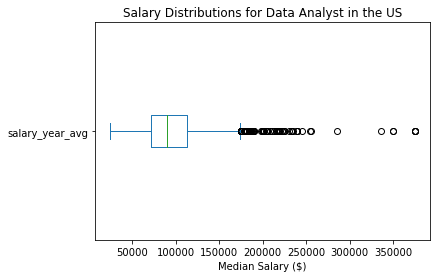

In [3]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
# or use plt.boxplot(df_DA_US.salary_year_avg)

plt.title("Salary Distributions for Data Analyst in the US")
plt.ylabel("")
plt.xlabel("Median Salary ($)")

plt.show()


In [4]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]

df_US = df[(df.job_title_short.isin(job_titles)) & (df.job_country == "United States")].copy()

df_US.job_title_short.value_counts()


Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: job_title_short, dtype: int64

In [5]:
df_US.salary_year_avg

3              NaN
5              NaN
9              NaN
11             NaN
17             NaN
            ...   
785673         NaN
785685         NaN
785692    157500.0
785703         NaN
785705         NaN
Name: salary_year_avg, Length: 161726, dtype: float64

In [6]:
df_US =df_US.dropna(subset=["salary_year_avg"])
df_US.salary_year_avg

92        120000.0
100       228222.0
109        89000.0
116       114000.0
146       129500.0
            ...   
785563    136400.0
785624    139216.0
785641    150000.0
785648    221875.0
785692    157500.0
Name: salary_year_avg, Length: 11818, dtype: float64

In [10]:
job_list = [df_US[df_US.job_title_short == job_title]["salary_year_avg"] for job_title in job_titles]
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

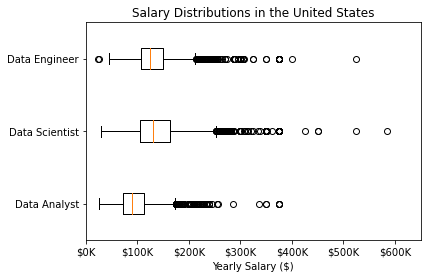

In [14]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title("Salary Distributions in the United States")
plt.xlabel("Yearly Salary ($)")
plt.xlim(0, 650_000) 

# Format x-axis to show 'Thousands'
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()